In [3]:
#Importamos librerias
import numpy as np
import sympy as sp
from sympy import *
from sympy.physics.vector import init_vprinting
import sys
import a_star #Libreria de path planning
import math
import matplotlib.pyplot as plt
import sim          # librería para conectar con CoppeliaSim
from time import sleep

c:\Users\ribae\Downloads\Essentials\College\Robótica\Prácticas\Automated-Drone\Path Planning\a_star.py start!!
min_x: 0
min_y: 0
max_x: 60
max_y: 60
x_width: 30
y_width: 30


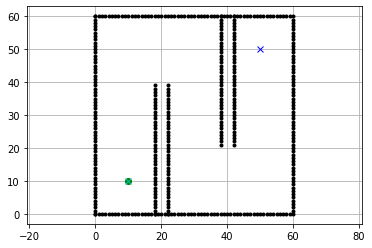

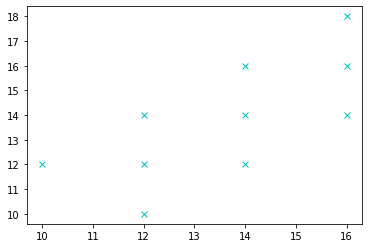

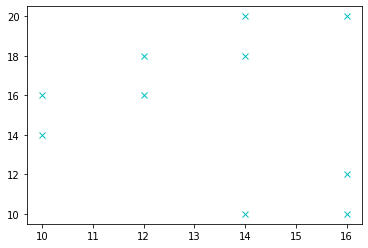

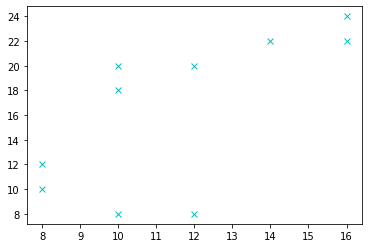

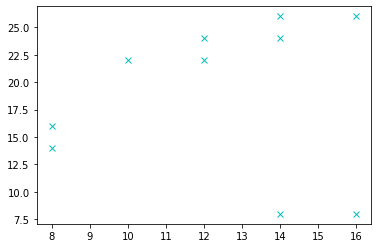

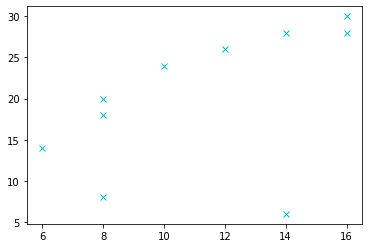

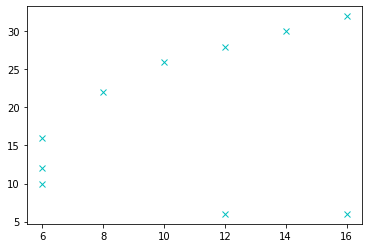

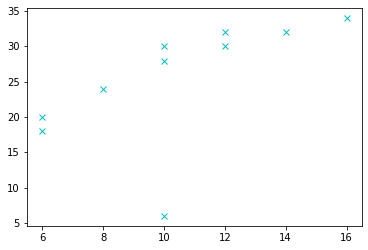

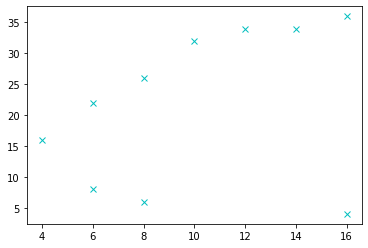

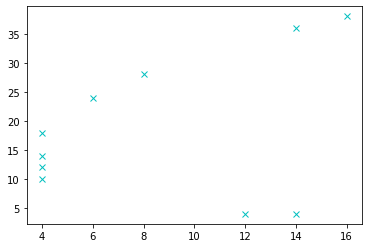

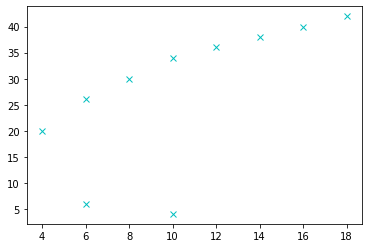

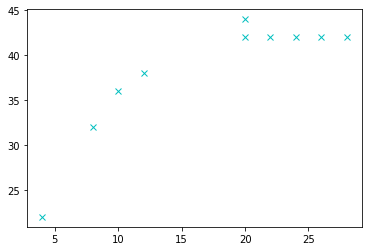

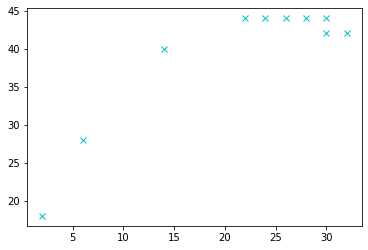

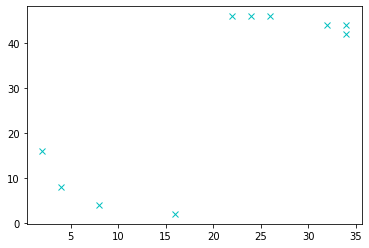

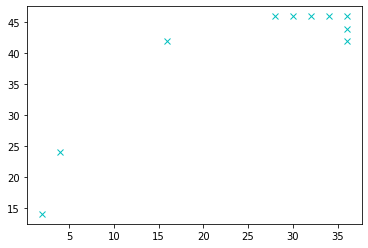

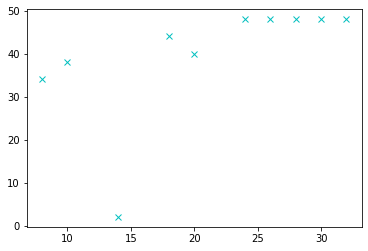

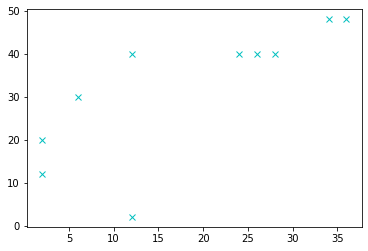

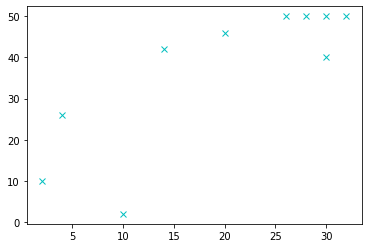

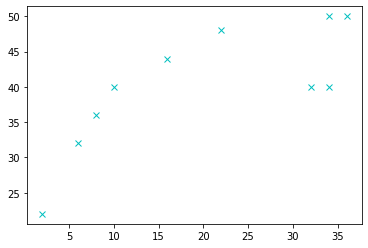

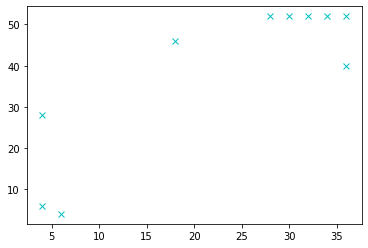

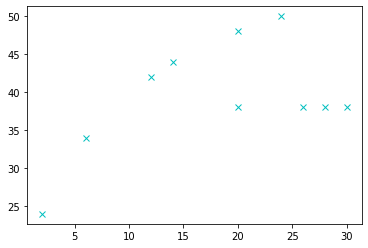

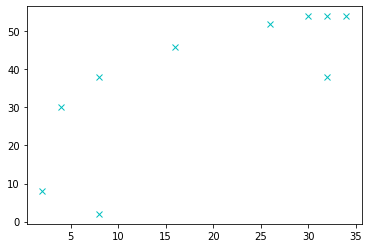

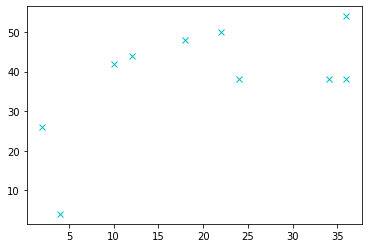

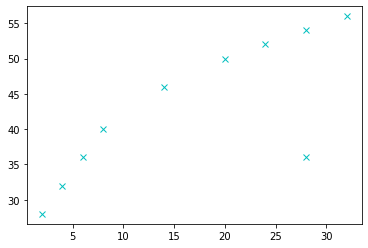

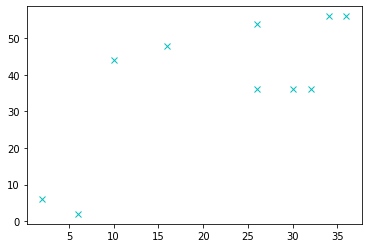

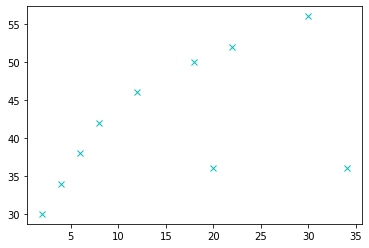

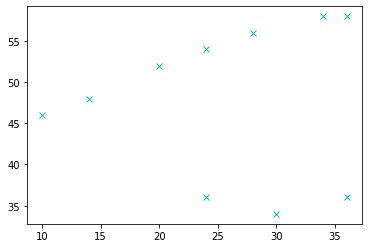

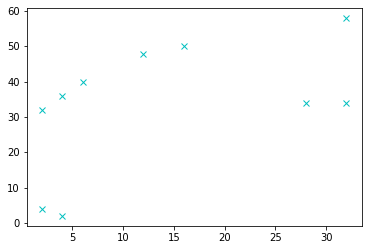

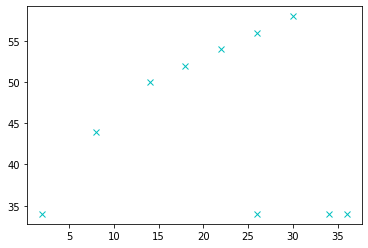

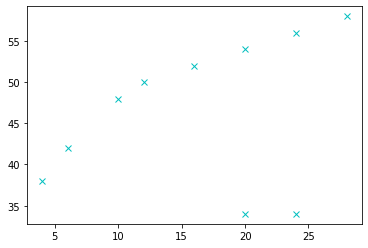

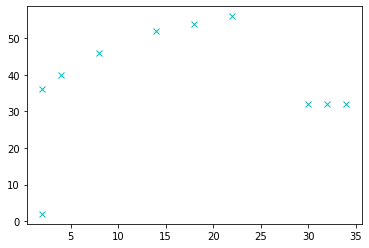

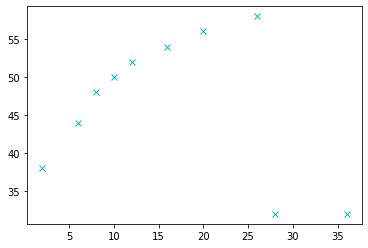

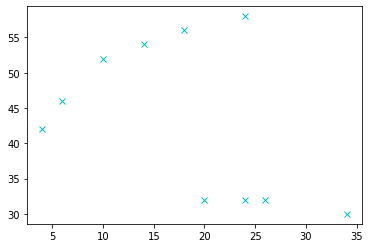

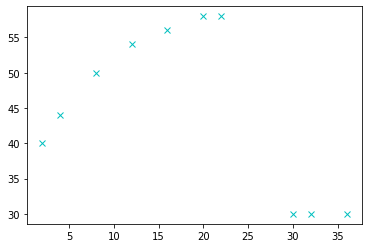

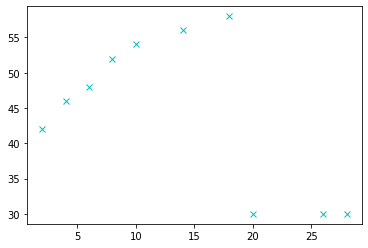

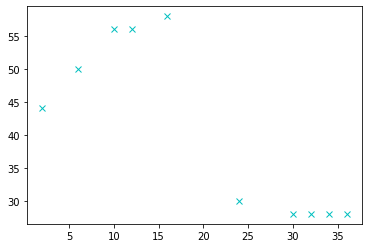

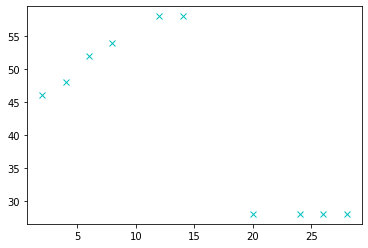

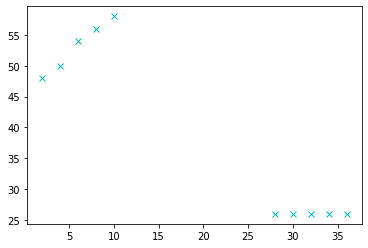

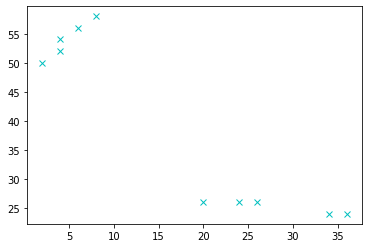

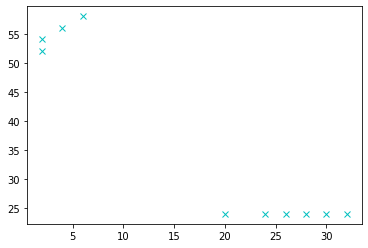

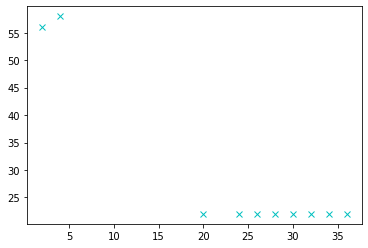

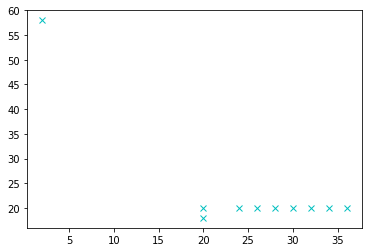

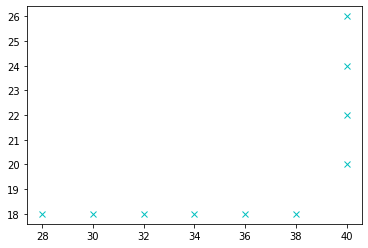

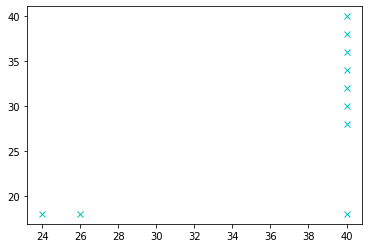

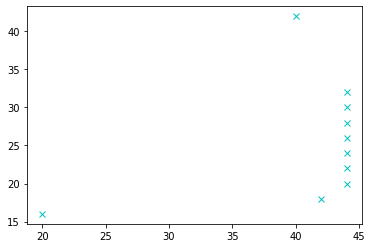

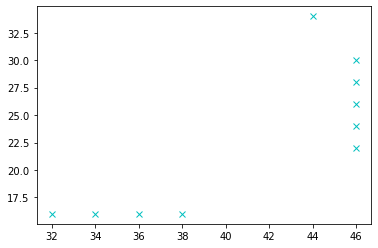

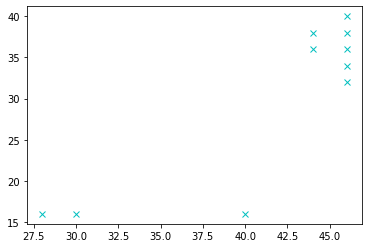

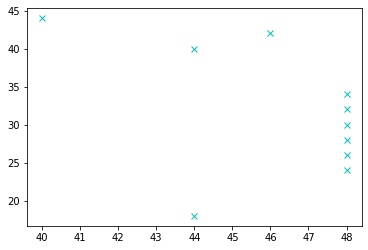

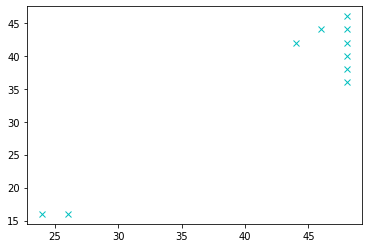

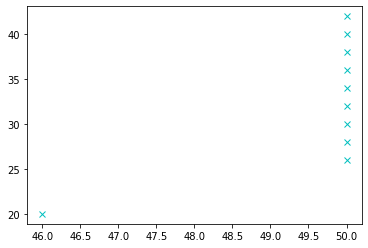

Find goal


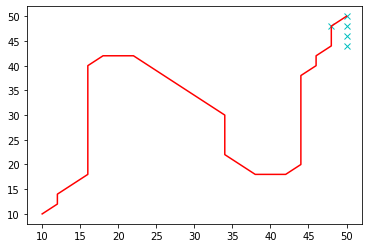

In [4]:
    from a_star import *
    print(a_star.__file__ + " start!!")

    #Definimos dimensiones del tablero
    #Definimos posición de inicio y final
    sx = 10.0  # [m]
    sy = 10.0  # [m]
    gx = 50.0  # [m]
    gy = 50.0  # [m]
    grid_size = 2.0  # [m]
    robot_radius = 1.0  # [m]

    # Posiciones de los obstaculos
    ox, oy = [], []
    for i in range(0, 60):
        ox.append(i)
        oy.append(0.0)
    for i in range(0, 60):
        ox.append(60.0)
        oy.append(i)
    for i in range(0, 61):
        ox.append(i)
        oy.append(60.0)
    for i in range(0, 61):
        ox.append(0.0)
        oy.append(i)
    for i in range(0, 40):
        ox.append(18.0)
        oy.append(i)
        ox.append(22.0)
        oy.append(i)
    for i in range(0, 40):
        ox.append(38.0)
        oy.append(60.0 - i)
        ox.append(42.0)
        oy.append(60.0 - i)

    if show_animation:  # pragma: no cover
        plt.plot(ox, oy, ".k")
        plt.plot(sx, sy, "og")
        plt.plot(gx, gy, "xb")
        plt.grid(True)
        plt.axis("equal")
    
    #Estas funciones definen el Path con las librerias importadas
    a_star = AStarPlanner(ox, oy, grid_size, robot_radius)
    rx, ry = a_star.planning(sx, sy, gx, gy)
    
    if show_animation:  # pragma: no cover
        plt.plot(rx, ry, "-r")
        plt.pause(0.001)
        plt.show()

In [5]:

def connect(port):
# Establece la conexión a VREP
# port debe coincidir con el puerto de conexión en VREP
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID

#Definimos ID del cliente
clientID = connect(19999)
#Definimos target del dron
retCode,dron=sim.simxGetObjectHandle(clientID,'Quadricopter_target',sim.simx_opmode_blocking)

#Función que hace set de la posición del dron
def move_q(pos):
    sim.simxSetObjectPosition(clientID, dron, -1, pos, sim.simx_opmode_oneshot)
    
#Definimos altura del dron
z = 1

#Definimos divisor. Este define lo grande los pasos que va a hacer el dron
deg = 10

#Por cada punto del path enviamos el movimiento a la API
for i in range(0,len(rx)):
    move_q([rx[i]/deg,ry[i]/deg,z])
    print(rx[i]/deg,ry[i]/deg)
    sleep(0.2)
    

conectado a 19999
5.0 5.0
4.8 4.8
4.8 4.6
4.8 4.4
4.6 4.2
4.6 4.0
4.4 3.8
4.4 3.6
4.4 3.4
4.4 3.2
4.4 3.0
4.4 2.8
4.4 2.6
4.4 2.4
4.4 2.2
4.4 2.0
4.2 1.8
4.0 1.8
3.8 1.8
3.6 2.0
3.4 2.2
3.4 2.4
3.4 2.6
3.4 2.8
3.4 3.0
3.2 3.2
3.0 3.4
2.8 3.6
2.6 3.8
2.4 4.0
2.2 4.2
2.0 4.2
1.8 4.2
1.6 4.0
1.6 3.8
1.6 3.6
1.6 3.4
1.6 3.2
1.6 3.0
1.6 2.8
1.6 2.6
1.6 2.4
1.6 2.2
1.6 2.0
1.6 1.8
1.4 1.6
1.2 1.4
1.2 1.2
1.0 1.0
